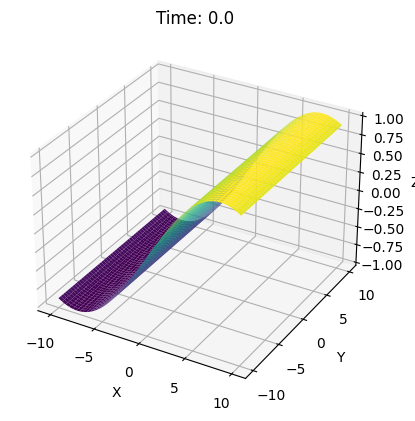

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the wave parameters
k = 0.2  # Wave number
omega = 0.5  # Angular frequency

# Animation update function
def update(t):
    Z = np.sin(k * X + omega * t)  # Wave equation
    ax.clear()  # Clear the previous plot
    ax.plot_surface(X, Y, Z, cmap='viridis')  # Plot the surface
    ax.set_zlim(-1, 1)  # Set the z-axis limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Time: {t}')

# Create the animation
t_values = np.linspace(0, 10, 100)

for t in t_values:
    update(t)
    plt.pause(0.1)  # Pause between frames

plt.show()


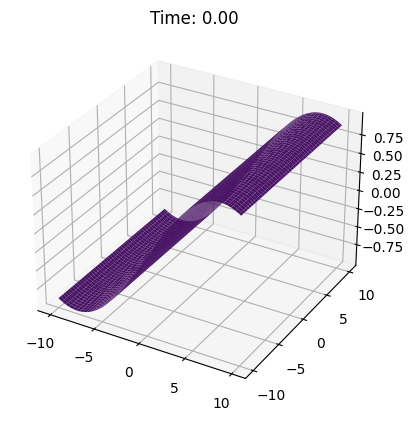

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the wave parameters
k = 0.2  # Wave number
omega = 0.5  # Angular frequency

# Initialize the plot surface
Z = np.sin(k * X + omega * 0)  # Initial wave surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Animation update function
def update(t):
    Z = np.sin(k * X + omega * t)  # Wave equation
    surf.set_array(Z.ravel())  # Update the surface values
    ax.set_title(f'Time: {t:.2f}')

# Create the animation
t_values = np.linspace(0, 10, 100)
for t in t_values:
    update(t)
    plt.pause(0.1)  # Pause between frames

plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


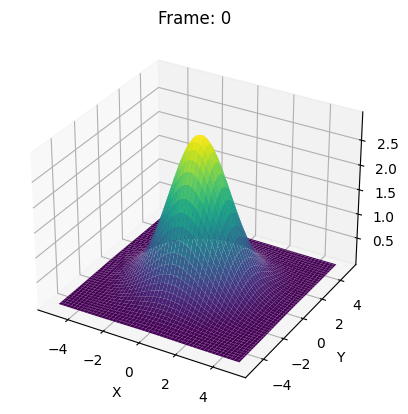

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up the parameters for the Gaussian
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Define the animation update function
def update(frame):
    # Varying parameters over time
    sigma = (frame * 0.1) + 1.5
    amplitude = np.cos(frame * 0.05) + 2.0
    
    # Calculate the Gaussian function
    Z = amplitude * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # Clear the previous plot
    ax.cla()
    
    # Plot the Gaussian surface
    ax.plot_surface(X, Y, Z, cmap='viridis')
    
    # Set the axis labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Frame: {frame}')
    
# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=100)



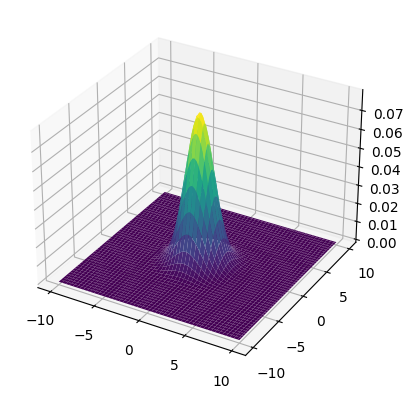

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Parameters for the Gaussian distribution
mu = [0, 0]
sigma = [[2, 0], [0, 2]]

# Function to calculate the Gaussian distribution
def gaussian(x, y, mu, sigma):
    X_mu = x - mu[0]
    Y_mu = y - mu[1]
    inv_sigma = np.linalg.inv(sigma)
    Z = np.exp(-0.5 * (X_mu * inv_sigma[0, 0] * X_mu + Y_mu * inv_sigma[1, 1] * Y_mu))
    return Z / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the plot
plot = [ax.plot_surface(X, Y, gaussian(X, Y, mu, sigma), cmap='viridis')]

# Function to update the plot for each frame of the animation
def update(frame):
    # Move the Gaussian mean over time
    mu[0] = np.sin(frame / 10) * 5
    mu[1] = np.cos(frame / 10) * 5

    # Update the surface plot with the new Gaussian distribution
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, gaussian(X, Y, mu, sigma), cmap='viridis')

# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 200, 1), interval=50)

# Display the animation
plt.show()


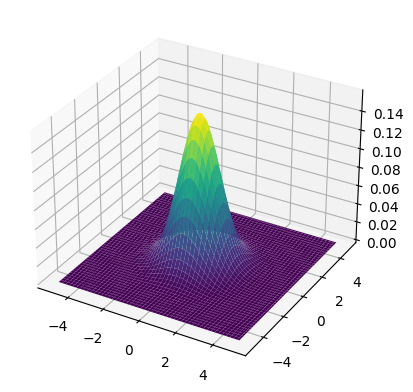

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create data points for x, y, and z
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2) / 2) / (2 * np.pi)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create an empty plot object for the animation
plot = ax.plot_surface(X, Y, Z, cmap='viridis')

# Animation update function
def update(frame):
    # Modify the height of the Gaussian surface based on the frame number
    Z_new = np.exp(-((X-frame/10)**2 + Y**2) / 2) / (2 * np.pi)
    plot.set_array(Z_new.ravel())
    return plot,

# Create the animation
animation = FuncAnimation(fig, update, frames=100, interval=100)
plt.show()
animation.save('named3.mp4')
# Display the animation


In [49]:
import ipywidgets as widgets
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

class AnimateSurface:
  def __init__(self, n_partition = 100, x_final = 50 , centered = True):
    if centered:
      self.x = np.linspace(-x_final,x_final, n_partition)
    else:
      self.x = np.linspace(0, x_final, n_partition)
    
  def func(self, t):
      fig = plt.figure(figsize=(5, 5))
      ax = plt.axes(projection='3d')

      # Create a grid of points in the x and y directions
      x = np.linspace(-3, 3, 100)
      y = np.linspace(-3, 3, 100)
      X, Y = np.meshgrid(x, y)

      # Compute the Gaussian surface based on the current time
      Z = np.exp(-(X ** 2 + Y ** 2) / (2 * (t + 1)))

      # Plot the surface
      ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Z')
      plt.show()
  
  def play(self,):
      widgets.interact(func, t=widgets.Play(min=0, max=15, step=1, interval=1000))
  
  def play(self):
      fig = plt.figure(figsize=(5, 5))
      ax = plt.axes(projection='3d')
      ani = animation.FuncAnimation(fig, self.func, frames=15, interval=1000, blit=True)
      ani.save('animation1.wmv', writer='ffmpeg')
